### Library importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import .csv to dataframe

In [2]:
df = pd.read_csv('responses.csv')

### Data corrections

In [16]:
df['At what age did you stop?'].replace({"I didn't stop, I still play music or sing": "Never stopped",
                                         "Above 18 years old": "> 18 years old"}, inplace=True)
df['In case you do, at what age did you start?'].replace({"Less than 5 years old": "< 5 years old"}, inplace=True)


In [3]:
print(df.columns)

Index(['Timestamp', 'Please select your gender:', 'Please enter your age:',
       'Please specify your nationality:',
       'When you think about your childhood, do you recall music being played regularly at home? ',
       'In case music was played at home, it was...',
       'Do you have any experience playing a musical instrument or singing?',
       'In case you do, at what age did you start?',
       'At what age did you stop?',
       'Is someone within your parents or relatives an amateur or professional musician?',
       'Do you generally think of your musical experience as positive or negative?',
       'Do you generally recall your childhood as positive or negative?',
       'Think about your first musical memory, the very first memory which involves music of any kind. What comes to your mind? Take a minute to think about it.',
       'Under which of these categories would you put this memory?',
       'Please describe this memory of lullabies:', 'How old were you?',
     

### Demographic graphs

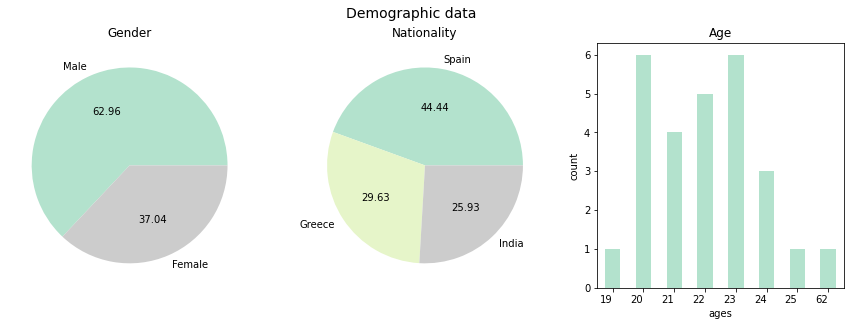

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle("Demographic data", fontsize=14)

df["Please select your gender:"].value_counts().plot.pie(ax=axes[0], 
                                                         autopct="%.2f", 
                                                         ylabel='', 
                                                         title='Gender', 
                                                         cmap="Pastel2")
                                                         
df["Please specify your nationality:"].value_counts().plot.pie(ax=axes[1], 
                                                               autopct="%.2f", 
                                                               ylabel='', 
                                                               title='Nationality', 
                                                               cmap="Pastel2")
                                                               
df["Please enter your age:"].value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                  xlabel='ages', 
                                                                  ylabel='count', 
                                                                  title='Age', 
                                                                  cmap="Pastel2")

# rotate x labels
fig.autofmt_xdate(rotation=0)

### Music experience

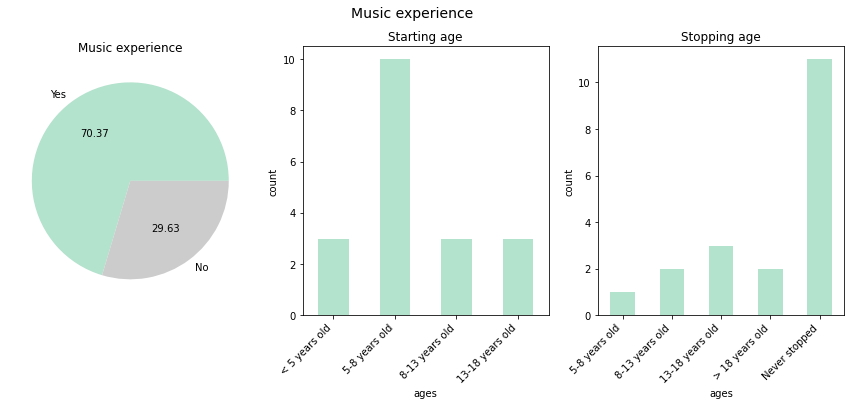

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5.5))
fig.suptitle("Music experience", fontsize=14)

df['Do you have any experience playing a musical instrument or singing?'].value_counts().plot.pie(ax=axes[0], 
                                                                                                  autopct="%.2f", 
                                                                                                  ylabel='', 
                                                                                                  title='Music experience', 
                                                                                                  cmap="Pastel2")

# define custom order for age ranges
ages = {"< 5 years old": 0.0,
        "5-8 years old": 1.0,
        "8-13 years old": 2.0,
        "13-18 years old": 3.0,
        "> 18 years old": 4.0,
        "Never stopped": 5.0}
inv_ages = {0.0: "< 5 years old",
            1.0: "5-8 years old",
            2.0: "8-13 years old",
            3.0: "13-18 years old",
            4.0: "> 18 years old",
            5.0: "Never stopped"}

df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[1], 
                                                                                                    xlabel='ages',
                                                                                                    ylabel='count', 
                                                                                                    title='Starting age', 
                                                                                                    cmap="Pastel2")

# get indices present in plot
idxs = list(df['In case you do, at what age did you start?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[1].set_xticklabels(labels=list(map(inv_ages.get, idxs)))
                                                                         
df['At what age did you stop?'].replace(ages).value_counts().sort_index().plot.bar(ax=axes[2], 
                                                                                   xlabel='ages', 
                                                                                   ylabel='count', 
                                                                                   title='Stopping age', 
                                                                                   cmap="Pastel2")
# get indices present in plot
idxs = list(df['At what age did you stop?'].replace(ages).value_counts().sort_index().index)
# map them back to text responses
axes[2].set_xticklabels(labels=list(map(inv_ages.get, idxs)))

# rotate x labels
fig.autofmt_xdate(rotation=45)



### Childhood